# Exercise 2

In [9]:
from typing import TypedDict, List
from langgraph.graph import StateGraph 
import math

In [10]:
class AgentState(TypedDict):
    name: str 
    values: List[int]
    operation: str
    result: str 

In [11]:
def process_values(state: AgentState) -> AgentState:
    """This function handles multiple different inputs"""
    if state["operation"] == "+":
        state["result"] = f"Hi {state['name']}, your answer is: {sum(state['values'])}"
    elif state["operation"] == "*":
        state["result"] = f"Hi {state['name']}, your answer is: {math.prod(state['values'])}"
    else:
        state["result"] = "Invalid!"

    return state

In [12]:
graph = StateGraph(AgentState)

graph.add_node("processor", process_values)
graph.set_entry_point("processor") 
graph.set_finish_point("processor") 

app = graph.compile() 

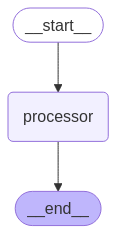

In [13]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
answers = app.invoke({"name": "Jack Sparrow","values": [1,2,3,4] , "operation": "*"})

In [15]:
print(answers["result"])

Hi Jack Sparrow, your answer is: 24
